In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv('bank_marketing_RETO_DS_AS.csv')


## Información de del DF

In [ ]:
print("Información general del dataset:")
print("Número de registros:", data.shape[0])
print("Número total de variables:", data.shape[1])
print("Tipos de datos:")
print(data.dtypes)
print("\nDatos faltantes por variable:")
print(data.isnull().sum())

Información general del dataset:
Número de registros: 9000
Número total de variables: 17
Tipos de datos:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Datos faltantes por variable:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


## Transformación de variables categóricas

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_cols = ['default', 'housing', 'loan', 'y']

In [ ]:
data = pd.get_dummies(data, columns=categorical_cols)


In [ ]:
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,31,0,2666,0,0,10,318,2,97,6,...,False,False,False,True,False,False,False,False,True,False
1,29,0,1584,0,0,6,245,1,-1,0,...,False,False,False,False,False,True,False,False,False,True
2,41,0,2152,1,0,17,369,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,50,0,84,1,0,17,18,8,-1,0,...,False,False,False,False,False,False,False,False,False,True
4,40,0,0,0,0,28,496,2,182,11,...,False,False,False,False,False,False,False,False,True,False


## Transformación de variables numéricas

In [ ]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.865132,0,0.390563,0,0,-0.673417,-0.106352,-0.189988,0.431706,2.357808,...,False,False,False,True,False,False,False,False,True,False
1,-1.036605,0,0.033567,0,0,-1.152755,-0.323016,-0.555270,-0.478348,-0.356939,...,False,False,False,False,False,True,False,False,False,True
2,-0.007764,0,0.220974,1,0,0.165425,0.045016,-0.555270,-0.478348,-0.356939,...,False,False,False,True,False,False,False,False,False,True
3,0.763867,0,-0.461344,1,0,0.165425,-0.996754,2.001709,-0.478348,-0.356939,...,False,False,False,False,False,False,False,False,False,True
4,-0.093501,0,-0.489059,0,0,1.483605,0.421953,-0.189988,1.221038,4.620098,...,False,False,False,False,False,False,False,False,True,False


## Definición de variable objetivo y de entrada

In [ ]:
X = data.drop(columns=['y'])
y = data['y']

## División de los datos en conjuntos de entrenamiento, validación y prueba

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Modelo de Regresión Logística

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Validación del modelo con el conjunto de validación
y_pred_val_log = log_model.predict(X_val)
print("Matriz de Confusión - Regresión Logística:")
print(confusion_matrix(y_val, y_pred_val_log))
print("Reporte de Clasificación - Regresión Logística:")
print(classification_report(y_val, y_pred_val_log))

Matriz de Confusión - Regresión Logística:
[[929 129]
 [187 555]]
Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1058
           1       0.81      0.75      0.78       742

    accuracy                           0.82      1800
   macro avg       0.82      0.81      0.82      1800
weighted avg       0.82      0.82      0.82      1800



In [ ]:
log_model_tuned = LogisticRegression(C=0.5)
log_model_tuned.fit(X_train, y_train)
y_pred_val_log_tuned = log_model_tuned.predict(X_val)
print("Matriz de Confusión ajustada - Regresión Logística:")
print(confusion_matrix(y_val, y_pred_val_log_tuned))
print("Reporte ajustado - Regresión Logística:")
print(classification_report(y_val, y_pred_val_log_tuned))

Matriz de Confusión ajustada - Regresión Logística:
[[929 129]
 [185 557]]
Reporte ajustado - Regresión Logística:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1058
           1       0.81      0.75      0.78       742

    accuracy                           0.83      1800
   macro avg       0.82      0.81      0.82      1800
weighted avg       0.82      0.83      0.82      1800



## Modelo de Red Neurona

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

In [ ]:
# Validación del modelo de red neuronal
y_pred_val_mlp = mlp_model.predict(X_val)
print("Matriz de Confusión - Red Neuronal:")
print(confusion_matrix(y_val, y_pred_val_mlp))
print("Reporte de Clasificación - Red Neuronal:")
print(classification_report(y_val, y_pred_val_mlp))

Matriz de Confusión - Red Neuronal:
[[916 142]
 [158 584]]
Reporte de Clasificación - Red Neuronal:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1058
           1       0.80      0.79      0.80       742

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800



In [ ]:
# Ajuste de parámetros para el modelo de red neuronal (ajustando número de neuronas)
mlp_model_tuned = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model_tuned.fit(X_train, y_train)
y_pred_val_mlp_tuned = mlp_model_tuned.predict(X_val)
print("Matriz de Confusión ajustada - Red Neuronal:")
print(confusion_matrix(y_val, y_pred_val_mlp_tuned))
print("Reporte ajustado - Red Neuronal:")
print(classification_report(y_val, y_pred_val_mlp_tuned))

Matriz de Confusión ajustada - Red Neuronal:
[[922 136]
 [188 554]]
Reporte ajustado - Red Neuronal:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1058
           1       0.80      0.75      0.77       742

    accuracy                           0.82      1800
   macro avg       0.82      0.81      0.81      1800
weighted avg       0.82      0.82      0.82      1800



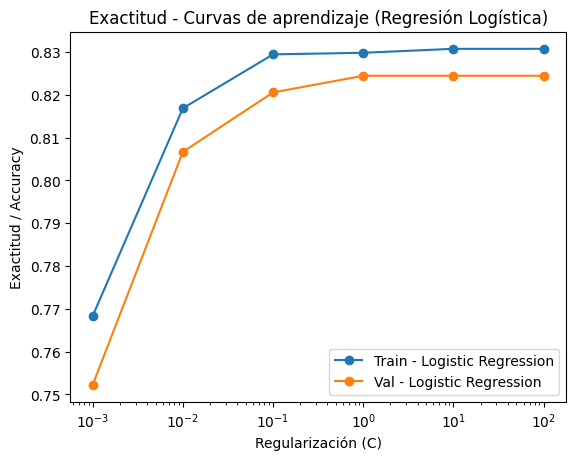

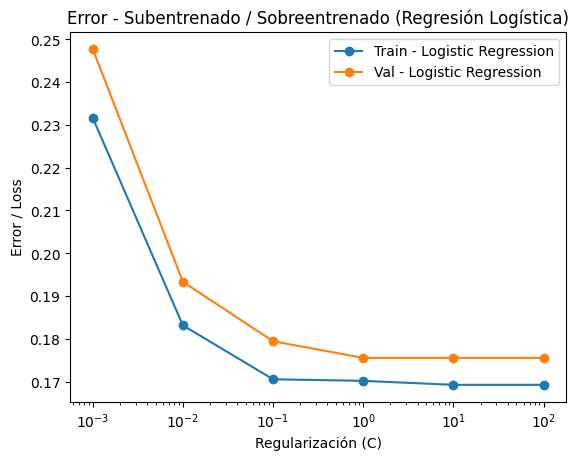

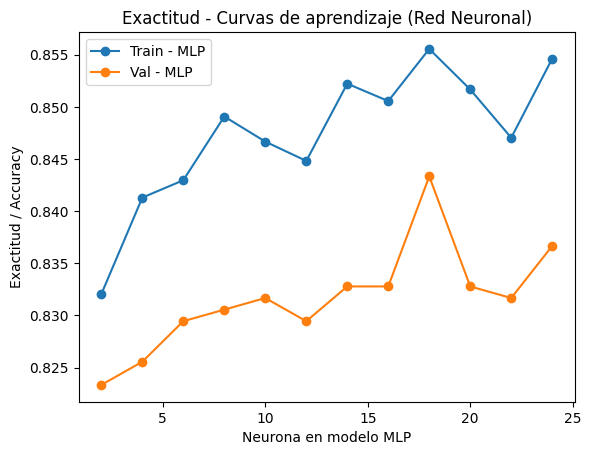

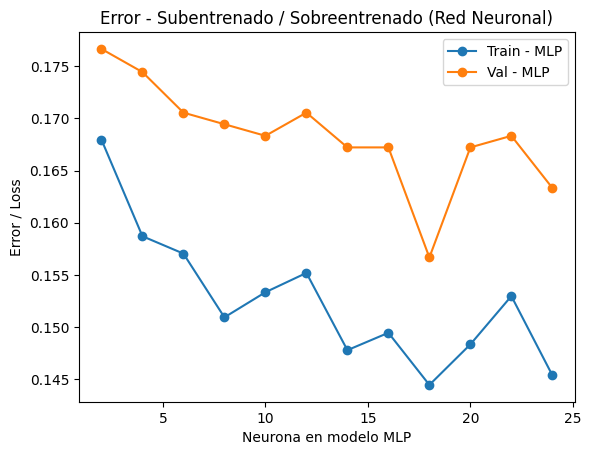

Exactitud del modelo final con el conjunto de prueba (Regresión Logística): 0.8205555555555556
Exactitud del modelo final con el conjunto de prueba (Red Neuronal): 0.8388888888888889


In [ ]:
regularizacion = [0.001, 0.01, 0.1, 1, 10, 100]
neuronas = [i for i in range(2, 25, 2)]

log_train_scores, log_val_scores = [], []
log_train_errors, log_val_errors = [], []

mlp_train_scores, mlp_val_scores = [], []
mlp_train_errors, mlp_val_errors = [], []

# REGRESIÓN LOGÍSTICA:
for c in regularizacion:
    model_log = LogisticRegression(C=c, max_iter=5000)
    model_log.fit(X_train, y_train)

    train_yhat_log = model_log.predict(X_train)
    train_loss_log = sum(abs(y_train - train_yhat_log)) / y_train.shape[0]
    log_train_errors.append(train_loss_log)
    log_train_scores.append(1 - train_loss_log)

    val_yhat_log = model_log.predict(X_val)
    val_loss_log = sum(abs(y_val - val_yhat_log)) / y_val.shape[0]
    log_val_errors.append(val_loss_log)
    log_val_scores.append(1 - val_loss_log)

# RED NEURONAL (MLP):
for i in neuronas:
    model_mlp = MLPClassifier(hidden_layer_sizes=(i, 2*i), max_iter=5000, learning_rate_init=0.001, alpha=2.1)
    model_mlp.fit(X_train, y_train)

    train_yhat_mlp = model_mlp.predict(X_train)
    train_loss_mlp = sum(abs(y_train - train_yhat_mlp)) / y_train.shape[0]
    mlp_train_errors.append(train_loss_mlp)
    mlp_train_scores.append(1 - train_loss_mlp)

    val_yhat_mlp = model_mlp.predict(X_val)
    val_loss_mlp = sum(abs(y_val - val_yhat_mlp)) / y_val.shape[0]
    mlp_val_errors.append(val_loss_mlp)
    mlp_val_scores.append(1 - val_loss_mlp)

plt.plot(regularizacion, log_train_scores, '-o', label='Train - Logistic Regression')
plt.plot(regularizacion, log_val_scores, '-o', label='Val - Logistic Regression')
plt.legend()
plt.title('Exactitud - Curvas de aprendizaje (Regresión Logística)')
plt.xlabel('Regularización (C)')
plt.ylabel('Exactitud / Accuracy')
plt.xscale('log')
plt.show()

plt.plot(regularizacion, log_train_errors, '-o', label='Train - Logistic Regression')
plt.plot(regularizacion, log_val_errors, '-o', label='Val - Logistic Regression')
plt.legend()
plt.title('Error - Subentrenado / Sobreentrenado (Regresión Logística)')
plt.xlabel('Regularización (C)')
plt.ylabel('Error / Loss')
plt.xscale('log')
plt.show()

plt.plot(neuronas, mlp_train_scores, '-o', label='Train - MLP')
plt.plot(neuronas, mlp_val_scores, '-o', label='Val - MLP')
plt.legend()
plt.title('Exactitud - Curvas de aprendizaje (Red Neuronal)')
plt.xlabel('Neurona en modelo MLP')
plt.ylabel('Exactitud / Accuracy')
plt.show()

plt.plot(neuronas, mlp_train_errors, '-o', label='Train - MLP')
plt.plot(neuronas, mlp_val_errors, '-o', label='Val - MLP')
plt.legend()
plt.title('Error - Subentrenado / Sobreentrenado (Red Neuronal)')
plt.xlabel('Neurona en modelo MLP')
plt.ylabel('Error / Loss')
plt.show()


print('Exactitud del modelo final con el conjunto de prueba (Regresión Logística):', model_log.score(X_test, y_test))
print('Exactitud del modelo final con el conjunto de prueba (Red Neuronal):', model_mlp.score(X_test, y_test))


## Decisión Final
He elegido como modelo final el de la Red Neural debido a que este posee una exactitud mayor a la de regresión logística. Adicionalmente, presenta un error menor en las gráficas que respaldan mi elección.